In [1]:
import pandas as pd
df=pd.read_csv("tic-tac-toe.data",sep=",",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [3]:
df.shape

(958, 10)

In [8]:
import numpy as np
np.unique(df.iloc[:,9])

array(['negative', 'positive'], dtype=object)

In [6]:
print("Number of positive cases: ",len(df[df.iloc[:,9]=="positive"]))

Number of positive cases:  626


In [7]:
print("Number of negative cases: ",len(df[df.iloc[:,9]=="negative"]))

Number of negative cases:  332


In [2]:
X=df.iloc[:,0:9]
X.head()

,0,1,2,3,4,5,6,7,8
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b


In [3]:
from sklearn.preprocessing import LabelEncoder
X=X.apply(LabelEncoder().fit_transform)
X.head()

,0,1,2,3,4,5,6,7,8
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0


In [4]:
y=pd.DataFrame(df.iloc[:,9])
y.head()

,9
0,positive
1,positive
2,positive
3,positive
4,positive


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import numpy as np

estimator=RandomForestClassifier(n_estimators=150,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(8),scoring="accuracy")
features.fit(X, np.asarray(y).reshape(y.shape[0],))

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 9


9 features. That is the entire predictor set "X".

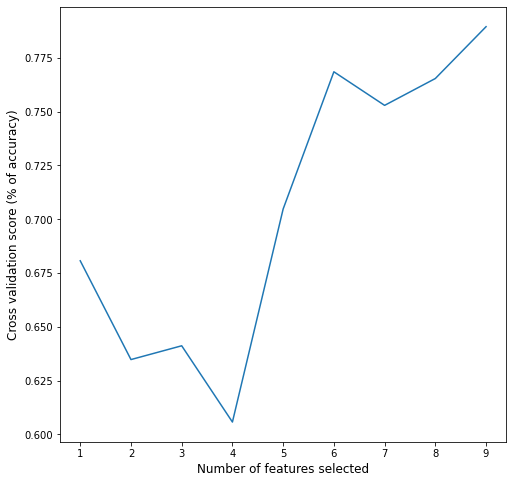

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel("Number of features selected",fontsize=12)
plt.ylabel("Cross validation score (% of accuracy)",fontsize=12)
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.104,random_state=12)
print(X_train.shape)
print(X_test.shape)

(858, 9)
(100, 9)


In [23]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 8, verbose=2, n_jobs = -1)

In [34]:
rf_random.fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   1.2s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   1.3s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   1.2s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   1.2s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   1.2s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=466, min_

[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   2.5s
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   2.4s
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   2.6s
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   2.9s
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=911, min_

[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.5s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.5s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   1.0s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=377, min_

[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=100, bootstrap=False, total=   1.6s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.7s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.9s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.8s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=644, min_sample

[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True, total=   2.3s
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True, total=   2.4s
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True, total=   2.4s
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True, total=   2.5s
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=644, min_samples_

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, bootstrap=True, total=   2.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, bootstrap=True, total=   2.9s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=90, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=90, bootstrap=True, total=   1.5s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=90, bootstrap=True 
[CV]  n_estimators=466, min_sam

[CV]  n_estimators=822, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.0s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.1s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.0s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.2s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.2s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=5

[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.0s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.0s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.9s
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=   1.3s
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.8s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.3s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.2s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.2s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=644, min_s

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False, total=   2.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False, total=   2.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=False 
[CV]  n_estimators=1

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True, total=   2.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True, total=   2.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.5s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.6s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=288, m

[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=None, bootstrap=False, total=   0.9s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True, total=   1.8s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True, total=   1.9s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True, total=   1.8s
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=466, min_sampl

[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True, total=   1.3s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True, total=   1.3s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True, total=   1.3s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True, total=   1.6s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=60, bootstrap=True 
[CV]  n_estimators=466, min_

[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=822, min_

[CV]  n_estimators=822, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=822, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=822, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.5s
[CV] n_estimators=822, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=822, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.9s
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=9

[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=False, total=   1.2s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.0s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.9s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=46

[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.0s
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.1s
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=377, min_

[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.7s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.6s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.6s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.6s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min_

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.0s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.0s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.0s
[CV] n_estimators=822, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=80, bootstrap=True 
[CV]  n_estimators=822, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=80, bootstrap=True, total=   2.8s
[CV] n_estimators=822, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=80, bootstrap=True 
[CV]  n_estimators=822, mi

[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.3s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total=   2.0s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total=   1.9s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total=   1.8s
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=64

[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 21.2min finished


RandomizedSearchCV(cv=8,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555,

In [35]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 60,
 'bootstrap': False}

In [51]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test : ",accuracy_score(y_test,y_pred))

Accuracy on test :  0.97


<Figure size 576x576 with 0 Axes>

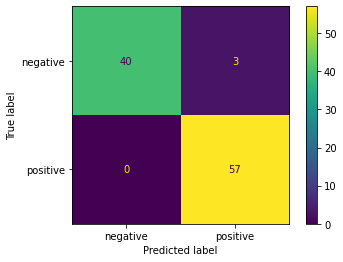

In [52]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(best_random,X_test,y_test)
plt.show()

In [53]:
from sklearn.preprocessing import label_binarize
y_pred=pd.DataFrame(y_pred)
y_test = label_binarize(y_test, classes=["positive","negative"])
n_classes = y_test.shape[1]
y_pred = label_binarize(y_pred, classes=["positive","negative"])

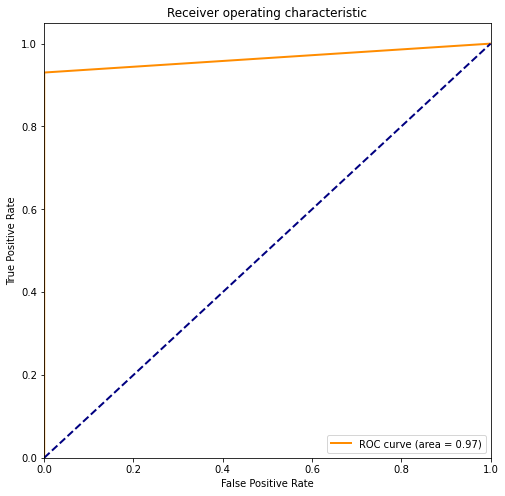

In [55]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,_=  roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()